In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import scipy.cluster.hierarchy as sch
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

#### **``` 💡This code performs several operations on data from a CSV file related to community participation. Here is a detailed description of what the code does: ```**

**1. Importing necessary libraries:**

>`
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import os  
from pathlib import Path  
`

🔸 It imports the pandas library, which is used for data manipulation, and the Path module from the pathlib library, which helps with file path operations.

**2. Loading data from a CSV file:**

>`
current_file_path = Path(__name__).resolve()
parent_directory_path = current_file_path.parent.parent
input_file_path = parent_directory_path / "data" / "03_Processed" / "Filtered_Selected_Features.csv"
data_filtered = pd.read_csv(input_file_path)
`

🔸 It retrieves the full path to the current script file and goes two levels up in the directory structure to get the path to the parent directory.

🔸Then, it constructs the path to the "Filtered_Selected_Features.csv" file in the "03_Processed" directory and reads data from this file into the variable data_filtered.

**3. Analysis of correlation between numerical variables:**

>`
numerical_data = data_filtered.select_dtypes(include=['number'])
`

🔸 It selects numerical variables from the loaded data using the select_dtypes function with the parameter include=['number'], creating a new DataFrame numerical_data containing only numerical columns.

**4. Checking data after filtering:**

>`
print(numerical_data.describe())
`

🔸It prints descriptive statistics for the numerical variables using the describe() method.

**5. Creating a triangular heatmap of correlations:**

>`
correlation_matrix = numerical_data.corr()
`

🔸It computes the correlation matrix for the numerical variables using the corr() method, creating the variable correlation_matrix.


**6. Masking the upper triangular part of the matrix:**

>`
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
`

🔸It creates a mask for the upper triangular part of the correlation matrix. This mask is used to hide the upper part of the matrix on the heatmap.

**7. Creating and displaying the triangular heatmap of correlations:**

>`
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5, vmin=-1, vmax=1, mask=mask, cbar_kws={"shrink": .75})
plt.title('Triangular heatmap of correlation between numerical variables', fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.show()
`

🔸It creates a new figure with a size of 15x10 inches.

🔸It creates the heatmap of correlations using the sns.heatmap function with various parameters such as annot=True (adding correlation values on the heatmap), cmap='YlGnBu' (color scheme), linewidths=0.5 (grid line thickness), vmin=-1 and vmax=1 (color scale), mask=mask (applying the mask), and cbar_kws={"shrink": .75} (shrinking the color bar).

🔸It adds a title, rotates the x and y axis labels, and displays the heatmap using plt.show().


#### **``` 💡 In summary, the code loads data from a CSV file, selects numerical variables, computes the correlation matrix, creates a triangular heatmap of correlations, and displays it.```**


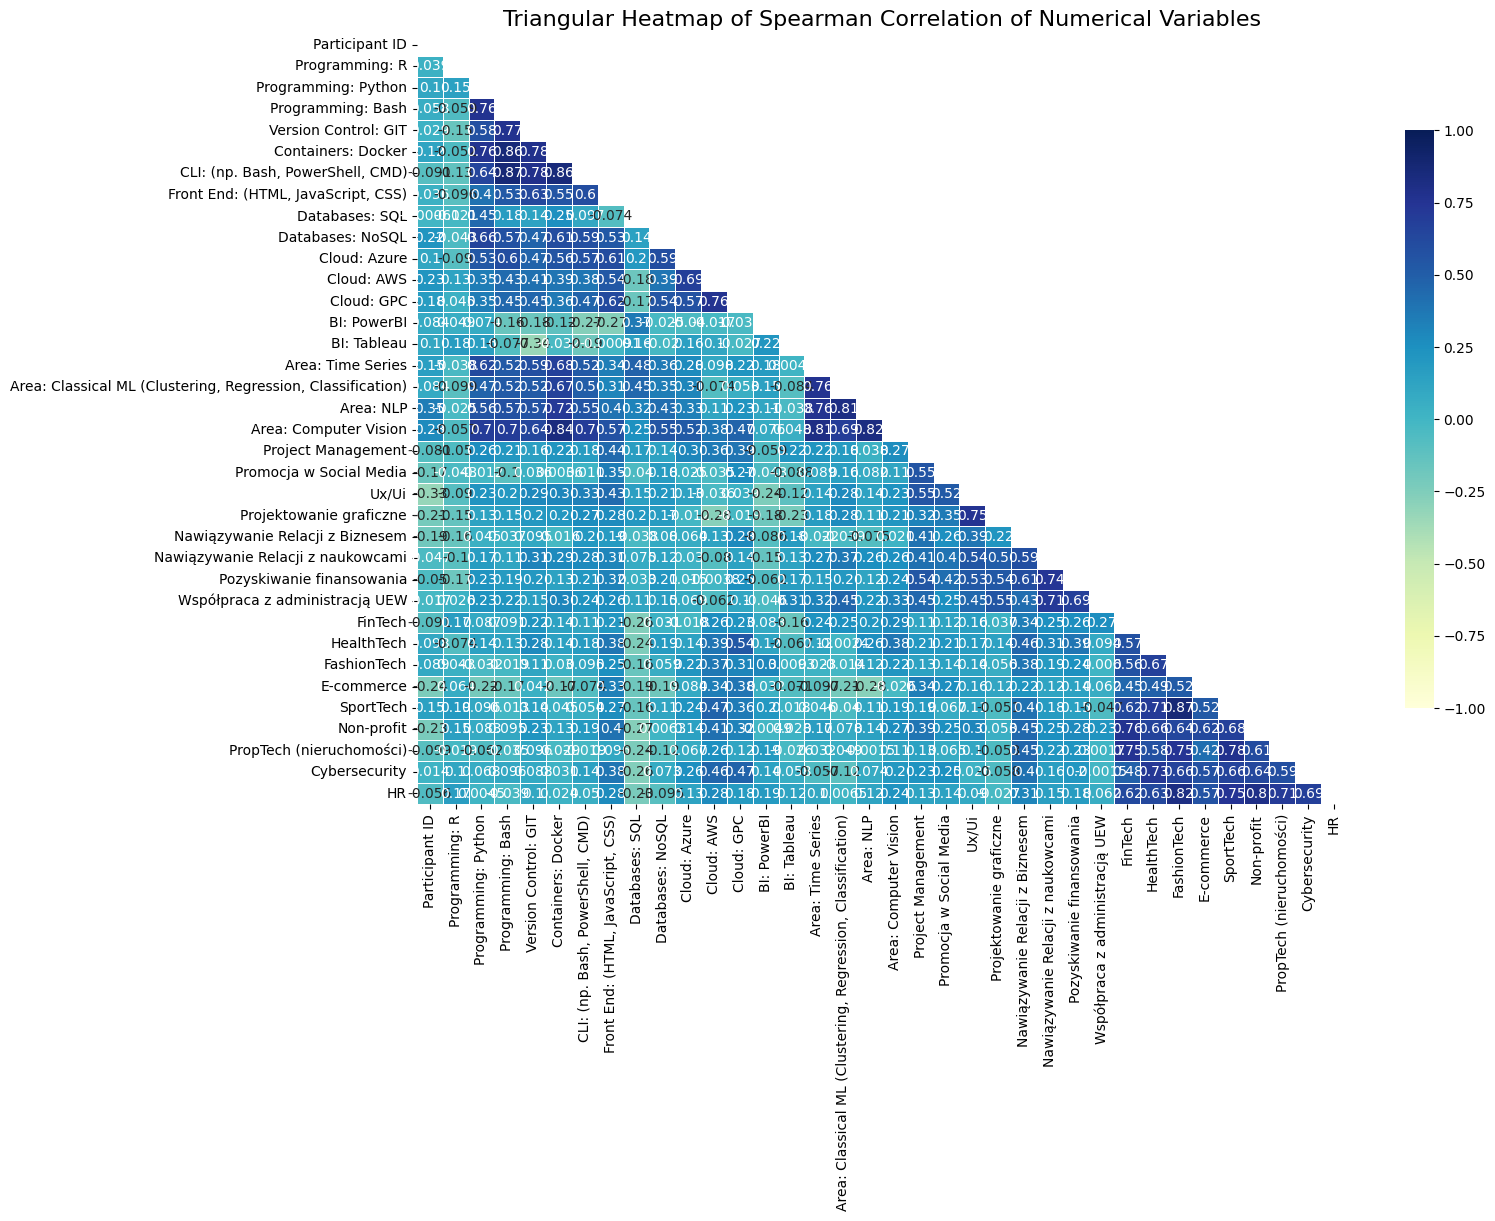

In [26]:
# Wczytanie danych z pliku Excel
current_file_path = Path(__name__).resolve()
parent_directory_path = current_file_path.parent.parent

input_file_path = parent_directory_path / "data" / "03_Processed" / "Filtered_Selected_Features.csv"
data_filtered = pd.read_csv(input_file_path)

# Select numerical columns for correlation analysis
numerical_data = data_filtered.select_dtypes(include=['number'])

# Create a triangular heatmap of Spearman correlation
correlation_matrix = numerical_data.corr(method="spearman")

# Mask the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5, vmin=-1, vmax=1, mask=mask, cbar_kws={"shrink": .75})
plt.title('Triangular Heatmap of Spearman Correlation of Numerical Variables', fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.show()


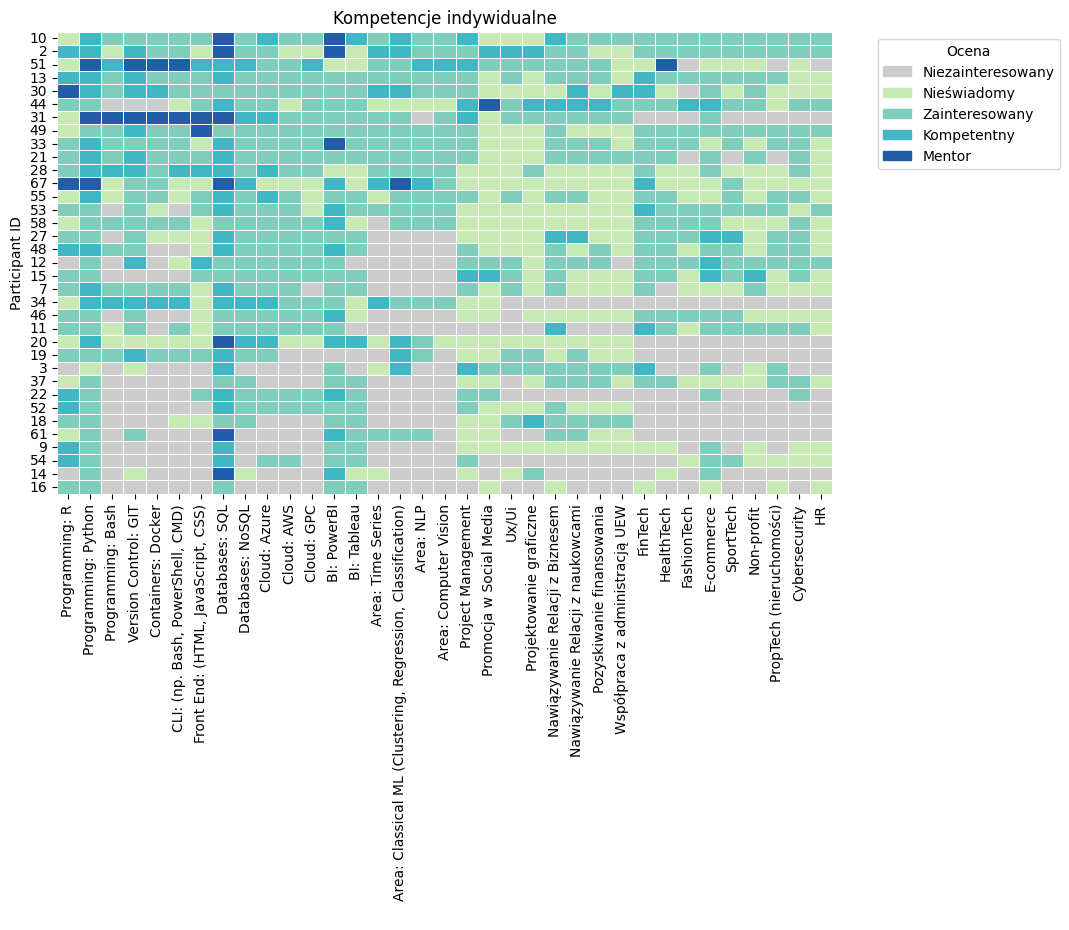

In [28]:
columns_to_exclude = ["Jeżeli jest obszar, na którym się znasz i chcesz go wykorzystać, dopisz go:", 
                      "Jeżeli pominięto branżę, na której się znasz dopisz ją:", "Community Participation"]
selected_data = data_filtered.drop(columns=columns_to_exclude)

selected_data.set_index('Participant ID', inplace=True)

selected_data['Sum'] = selected_data.sum(axis=1)
selected_data = selected_data.sort_values(by='Sum', ascending=False).drop(columns=['Sum'])

colors = ['#CCCCCC', '#C7E9B4', '#7FCDBB', '#41B6C4', '#225EA8']
levels = [0.0, 1.0, 2.0, 3.0, 4.0]
cmap = ListedColormap(colors)

plt.figure(figsize=(10, 6))
sns.heatmap(selected_data, cmap=cmap, vmin=0.0, vmax=4.0, annot=False, fmt=".1f", cbar=False, linewidths=.5, linecolor='#FFFFFF')
plt.title('Kompetencje indywidualne')
plt.xlabel(' ')
plt.ylabel('Participant ID')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Tworzenie niestandardowego colorbar'a
legend_labels = ['Niezainteresowany', 'Nieświadomy', 'Zainteresowany', 'Kompetentny', 'Mentor']
legend_patches = [Patch(color=colors[i], label=legend_labels[i]) for i in range(len(legend_labels))]
plt.legend(handles=legend_patches, title='Ocena', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.yticks(ticks=np.arange(0.5, len(selected_data.index) + 0.5), labels=selected_data.index)

plt.show()


<Figure size 1400x800 with 0 Axes>

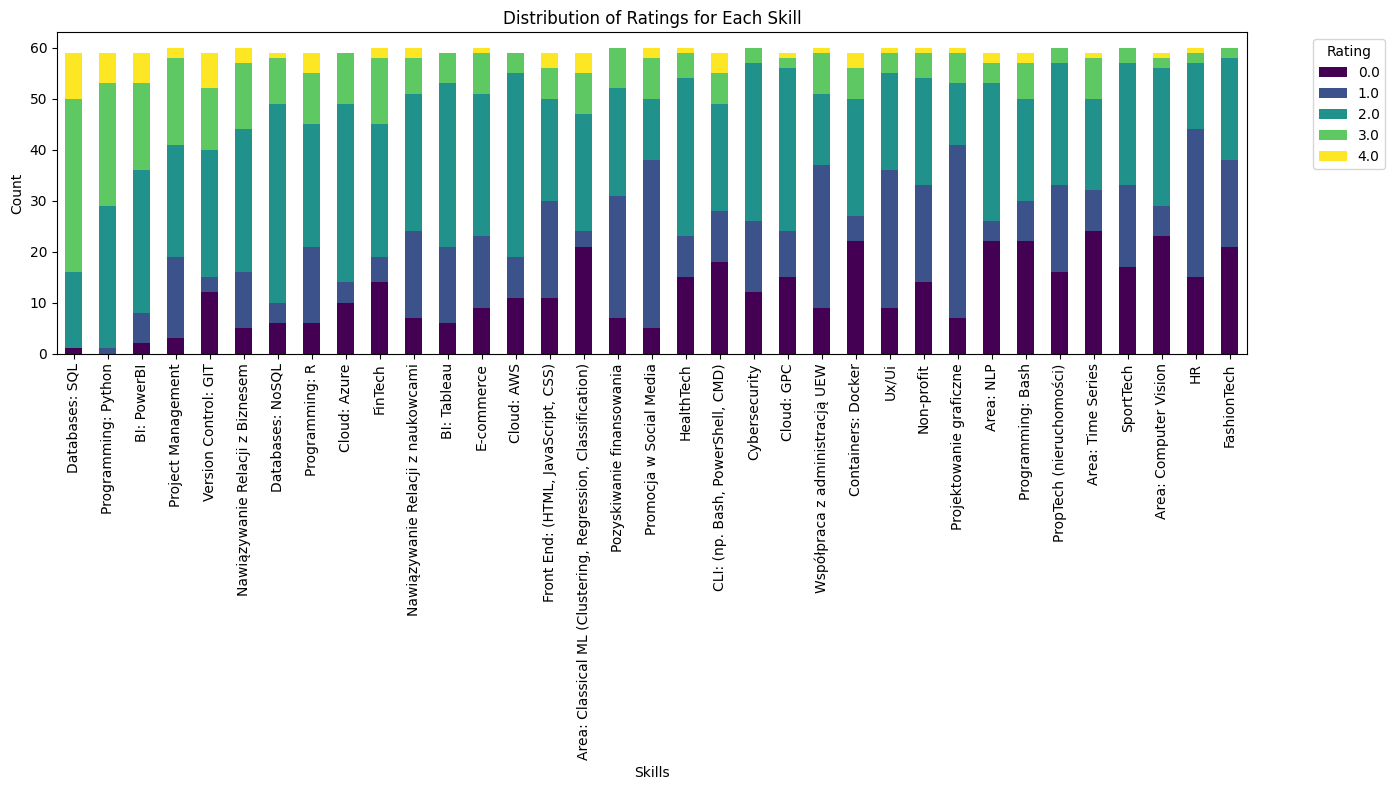

In [ ]:

numeric_data = data_filtered.drop(columns=['Participant ID'])

# Calculate the mean rating for each skill
mean_ratings = numeric_data.mean(numeric_only=True)

# Sort the columns by mean rating in descending order
sorted_columns = mean_ratings.sort_values(ascending=False).index
sorted_data = numeric_data[sorted_columns]

# Plot the distribution of ratings for each skill
plt.figure(figsize=(14, 8))

cmap = ListedColormap(plt.cm.viridis(np.linspace(0, 1, sorted_data.apply(pd.Series.value_counts).shape[0])))
# Create a stacked bar plot
sorted_data.apply(pd.Series.value_counts).fillna(0).sort_index().T.plot(kind='bar', stacked=True, colormap=cmap, figsize=(14, 8))


plt.title('Distribution of Ratings for Each Skill')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save and display the plot
plt.show()

In [ ]:

from sklearn.preprocessing import StandardScaler

# Drop non-numeric columns and fill missing values with the mean
numeric_data = data_filtered.select_dtypes(include=[np.number]).fillna(data.mean(numeric_only=True))

# Standardize the data
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

# Transpose the data to calculate the linkage based on columns (skills)
numeric_data_t_scaled = numeric_data_scaled.T

# Calculate the linkage matrix
linkage_matrix = sch.linkage(numeric_data_t_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(14, 8))
dendrogram = sch.dendrogram(linkage_matrix, labels=numeric_data.columns, leaf_rotation=90)
plt.title('Dendrogram of Variables')
plt.xlabel('Skills')
plt.ylabel('Distance')
plt.tight_layout()

# Save and display the plot

plt.show()

NameError: name 'data' is not defined